_Lambda School Data Science_

# Make Explanatory Visualizations

### Objectives

- identify misleading visualizations and how to fix them
- use Seaborn to visualize distributions and relationships with continuous and discrete variables
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

# Avoid Misleading Visualizations

Did you find/discuss any interesting misleading visualizations in your Walkie Talkie?

## What makes a visualization misleading?

[5 Ways Writers Use Misleading Graphs To Manipulate You](https://venngage.com/blog/misleading-graphs/)

## Two y-axes

<img src="https://kieranhealy.org/files/misc/two-y-by-four-sm.jpg" width="800">
 
 Other Examples: 
 - [Spurious Correlations](https://tylervigen.com/spurious-correlations)
 - <https://blog.datawrapper.de/dualaxis/>
 - <https://kieranhealy.org/blog/archives/2016/01/16/two-y-axes/>
 - <http://www.storytellingwithdata.com/blog/2016/2/1/be-gone-dual-y-axis>

##  Y-axis doesn't start at zero.

<img src="https://i.pinimg.com/originals/22/53/a9/2253a944f54bb61f1983bc076ff33cdd.jpg" width="600">

## Pie Charts are bad

<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2009/11/Fox-News-pie-chart.png?fit=620%2C465&ssl=1" width="600">

## Pie charts that omit data are extra bad
 
- A guy makes a misleading chart that goes viral

 What does this chart imply at first glance? You don't want your user to have to do a lot of work in order to be able to interpret you graph correctly. You want that first-glance conclusions to be the correct ones.

 <img src="https://pbs.twimg.com/media/DiaiTLHWsAYAEEX?format=jpg&name=medium" width='600'>
 
 <https://twitter.com/michaelbatnick/status/1019680856837849090?lang=en>
 
- It gets picked up by overworked journalists (assuming incompetency before malice)
 
 <https://www.marketwatch.com/story/this-1-chart-puts-mega-techs-trillions-of-market-value-into-eye-popping-perspective-2018-07-18>
 
- Even after the chart's implications have been refuted, it's hard a bad (although compelling) visualization from being passed around.

 <https://www.linkedin.com/pulse/good-bad-pie-charts-karthik-shashidhar/>

**["yea I understand a pie chart was probably not the best choice to present this data."](https://twitter.com/michaelbatnick/status/1037036440494985216)**

## Pie Charts that compare unrelated things are next-level extra bad

<img src="http://www.painting-with-numbers.com/download/document/186/170403+Legalizing+Marijuana+Graph.jpg" width="600">


## Be careful about how you use volume to represent quantities:

radius vs diameter vs volume

<img src="https://static1.squarespace.com/static/5bfc8dbab40b9d7dd9054f41/t/5c32d86e0ebbe80a25873249/1546836082961/5474039-25383714-thumbnail.jpg?format=1500w" width="600">

## Don't cherrypick timelines or specific subsets of your data:

<img src="https://wattsupwiththat.com/wp-content/uploads/2019/02/Figure-1-1.png" width="600">

Look how specifically the writer has selected what years to show in the legend on the right side.

<https://wattsupwiththat.com/2019/02/24/strong-arctic-sea-ice-growth-this-year/>

Try the tool that was used to make the graphic for yourself

<http://nsidc.org/arcticseaicenews/charctic-interactive-sea-ice-graph/>
                                                                                           

## Use Relative units rather than Absolute Units

<img src="https://imgs.xkcd.com/comics/heatmap_2x.png" width="600">

## Avoid 3D graphs unless having the extra dimension is effective

Usually you can Split 3D graphs into multiple 2D graphs

3D graphs that are interactive can be very cool. (See Plotly and Bokeh)

<img src="https://thumbor.forbes.com/thumbor/1280x868/https%3A%2F%2Fblogs-images.forbes.com%2Fthumbnails%2Fblog_1855%2Fpt_1855_811_o.jpg%3Ft%3D1339592470" width="600">

## Don't go against typical conventions

<img src="http://www.callingbullshit.org/twittercards/tools_misleading_axes.png" width="600">

# Tips for choosing an appropriate visualization:

## Use Appropriate "Visual Vocabulary"

[Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)

## What are the properties of your data?
- Is your primary variable of interest continuous or discrete?
- Is in wide or long (tidy) format?
- Does your visualization involve multiple variables?
- How many dimensions do you need to include on your plot?

Can you express the main idea of your visualization in a single sentence?

How hard does your visualization make the user work in order to draw the intended conclusion?

## Which Visualization tool is most appropriate? 

[Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)

## Simple Web Scraper with IMDB

In [1]:
# Load the page to be scraped
from requests import get

url = 'https://www.imdb.com/title/tt6105098/ratings?ref_=tt_ov_rt'
response = get(url)
print(response.text[:500])











<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///title/tt6105098?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
     


In [2]:
# Parse the text using the BeautifulSoup html parser
from bs4 import BeautifulSoup

html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [3]:
# Pull out all the vote container using the unique text around the votes
vote_container = html_soup.find_all('div', class_='leftAligned')
vote_container[1:11]

[<div class="leftAligned">10,787</div>,
 <div class="leftAligned">6,975</div>,
 <div class="leftAligned">12,802</div>,
 <div class="leftAligned">13,662</div>,
 <div class="leftAligned">7,298</div>,
 <div class="leftAligned">3,360</div>,
 <div class="leftAligned">1,549</div>,
 <div class="leftAligned">1,052</div>,
 <div class="leftAligned">792</div>,
 <div class="leftAligned">2,656</div>]

In [4]:
# Pull out the actual votes from the container
votes = [containers.text for containers in vote_container]
votes[1:11]

['10,787',
 '6,975',
 '12,802',
 '13,662',
 '7,298',
 '3,360',
 '1,549',
 '1,052',
 '792',
 '2,656']

In [5]:
# Create a routine for iterating through 4 rating web pages
urls = ['https://www.imdb.com/title/tt6105098/ratings?ref_=tt_ov_rt',     # Lion King (2019)
        'https://www.imdb.com/title/tt0110357/ratings?ref_=tt_ov_rt',     # Lion King (1994)
        'https://www.imdb.com/title/tt6139732/ratings?ref_=tt_ov_rt',     # Aladdin (2019)
        'https://www.imdb.com/title/tt0103639/ratings?ref_=tt_ov_rt']     # Aladdin (1992) w/ Robin Williams
votes_list = []
for url in urls:
    # Get raw HTML response
    response = get(url)
    
    # Convert to BS Object
    html_soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find vote containers and extract star ratings
    vote_containers = html_soup.find_all('div', class_ = 'leftAligned')
    votes = [containers.text for containers in vote_containers][1:11]
    
    # Append to initial list
    votes_list.append(votes)
    
print(votes_list)

[['10,787', '6,975', '12,802', '13,662', '7,298', '3,360', '1,549', '1,052', '792', '2,656'], ['254,751', '219,298', '213,629', '100,751', '33,091', '13,247', '5,344', '3,011', '1,969', '4,956'], ['14,809', '11,785', '22,747', '20,329', '8,631', '3,348', '1,514', '916', '666', '2,396'], ['58,919', '61,238', '111,146', '61,573', '20,592', '7,057', '2,593', '1,199', '689', '1,249']]


In [6]:
# Create the dataframe for the data
import pandas as pd

movies = ['The Lion King (2019)', 'The Lion King (1994)', 'Aladdin (2019)', 'Aladdin (1992)']

df = pd.DataFrame(votes_list)
df = df.T
df.columns = movies
df = df.apply(lambda x: x.str.replace(',',''))
df['Star Rating'] = range(1,11)[::-1]
df


,The Lion King (2019),The Lion King (1994),Aladdin (2019),Aladdin (1992),Star Rating
0,10787,254751,14809,58919,10
1,6975,219298,11785,61238,9
2,12802,213629,22747,111146,8
3,13662,100751,20329,61573,7
4,7298,33091,8631,20592,6
5,3360,13247,3348,7057,5
6,1549,5344,1514,2593,4
7,1052,3011,916,1199,3
8,792,1969,666,689,2
9,2656,4956,2396,1249,1


In [7]:
# Convert df into tidy-format
df_tidy = df.melt(id_vars='Star Rating')
df_tidy = df_tidy.rename(columns={'variable': 'Movie', 'value':'Number of Votes'})
df_tidy['Number of Votes'] = pd.to_numeric(df_tidy['Number of Votes'])
df_tidy.head()

,Star Rating,Movie,Number of Votes
0,10,The Lion King (2019),10787
1,9,The Lion King (2019),6975
2,8,The Lion King (2019),12802
3,7,The Lion King (2019),13662
4,6,The Lion King (2019),7298


In [8]:
# Add a Vote Percent column
df_tidy['Vote Percent'] = df_tidy.groupby('Movie')['Number of Votes'].apply(lambda x: x / x.sum() *100)
df_tidy.head()

,Star Rating,Movie,Number of Votes,Vote Percent
0,10,The Lion King (2019),10787,17.703051
1,9,The Lion King (2019),6975,11.446999
2,8,The Lion King (2019),12802,21.009962
3,7,The Lion King (2019),13662,22.421348
4,6,The Lion King (2019),7298,11.977090


In [9]:
# Check that Number of Votes is integer
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
Star Rating        40 non-null int64
Movie              40 non-null object
Number of Votes    40 non-null int64
Vote Percent       40 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ KB


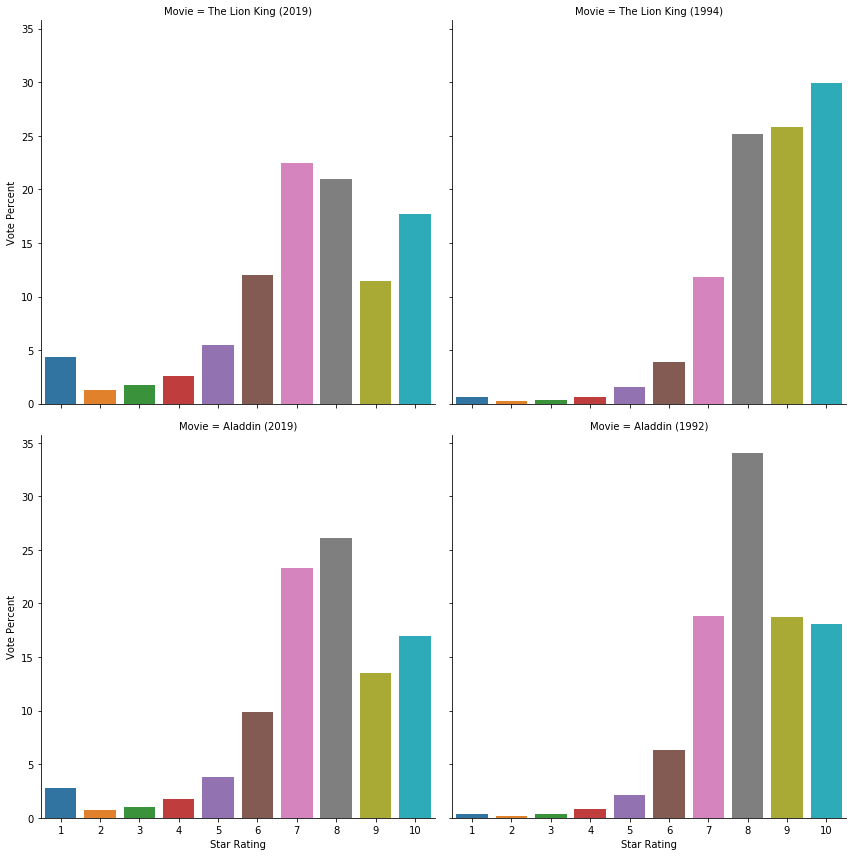

In [10]:
import seaborn as sns

sns.catplot(x='Star Rating', y='Vote Percent', col='Movie', col_wrap=2, height=6, kind='bar', data=df_tidy);

## Anatomy of a Matplotlib Plot

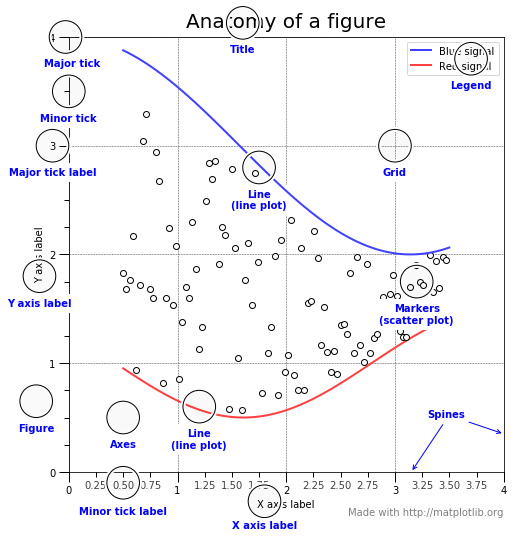

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')

# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

# Making Explanatory Visualizations with Seaborn

Today we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)



In [12]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

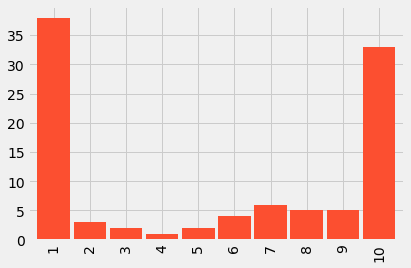

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

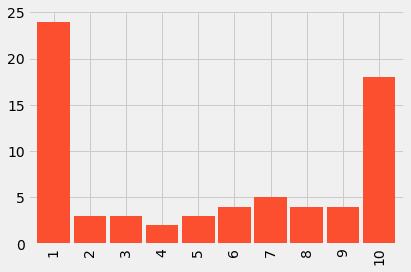

In [14]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

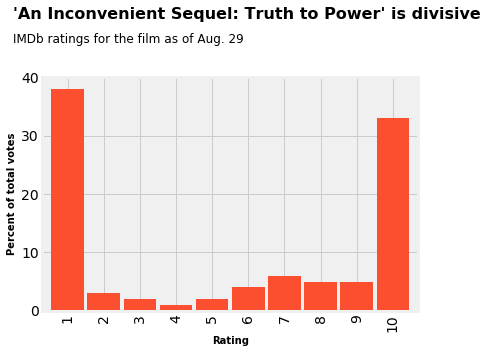

In [15]:
# Create 'fivethirtyeight' plot using fake data
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(facecolor='white')

fake.plot.bar(color="C1", width=0.9)
plt.text(x=-1.5, y=50, fontsize=16, fontweight='bold', s = "'An Inconvenient Sequel: Truth to Power' is divisive")
plt.text(x=-1.5, y=46, fontsize=12, s = "IMDb ratings for the film as of Aug. 29")
plt.yticks([0, 10, 20, 30, 40])
plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.ylabel('Percent of total votes', fontsize=10,fontweight='bold' );         

## Reproduce with real data

In [16]:
# Read in data
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
print(df.shape)
df.head()

(80053, 27)


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [17]:
# Check the data
print(df.category.value_counts())
df.dtypes

Females Aged 30-44    4216
Non-US users          4216
IMDb users            4216
US users              4216
Aged 30-44            4216
Males Aged 30-44      4216
Males under 18        4216
Females               4216
Males                 4216
IMDb staff            4216
Females Aged 18-29    4216
Aged 45+              4216
Females Aged 45+      4216
Males Aged 18-29      4216
Aged 18-29            4216
Aged under 18         4216
Males Aged 45+        4216
Top 1000 voters       4216
Females under 18      4165
Name: category, dtype: int64


timestamp       object
respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
10_votes         int64
1_pct          float64
2_pct          float64
3_pct          float64
4_pct          float64
5_pct          float64
6_pct          float64
7_pct          float64
8_pct          float64
9_pct          float64
10_pct         float64
dtype: object

In [18]:
# Ensure timestamp is datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [19]:
# Create a dataframe with just IMDB users
df_imdb = df[df.category == 'IMDb users']
df_imdb.shape

(4216, 27)

In [20]:
# Create the final results by taking the last row - 8-29-17
final = df_imdb.tail(1)
final

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [21]:
# Create a columns list
columns = [f'{i}_pct' for i in range(1,11)]
columns

['1_pct',
 '2_pct',
 '3_pct',
 '4_pct',
 '5_pct',
 '6_pct',
 '7_pct',
 '8_pct',
 '9_pct',
 '10_pct']

In [22]:
# Create the dataframe of votes
data = final[columns]
data = data.T
data.index = range(1,11)
data

,80052
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


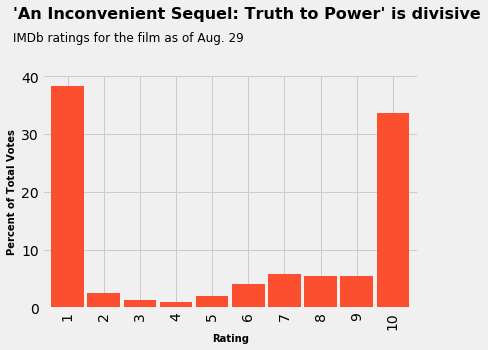

In [23]:
plt.style.use('fivethirtyeight')

data.plot.bar(color='C1', width=0.9, legend=False)
plt.text(x=-1.5, y=50, fontsize=16, fontweight='bold',
         s = "'An Inconvenient Sequel: Truth to Power' is divisive")
plt.text(x=-1.5, y=46, fontsize=12,
         s = "IMDb ratings for the film as of Aug. 29")
plt.yticks([0, 10, 20, 30, 40])
plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold');

## Code Challenge

In [24]:
import pandas as pd

# Data Frame to practice .loc[] techniques on
df = pd.DataFrame({'index':[1, 2, 3, 4, 5],
                   'name_1':['entry1', 'entry2', 'entry3', 'entry4', 'entry5'],
                   'name_2':['entry1', 'entry2', 'entry3', 'entry4', 'entry5'],
                   'name_3':['entry1', 'entry2', 'entry3', 'entry4', 'entry5'],
                   'name_4':['entry1', 'entry2', 'entry3', 'entry4', 'entry5'],
                   'name_5':['entry1', 'entry2', 'entry3', 'entry4', 'entry5']})

# Set Index
df.set_index('index', inplace=True)

print(df)




### Select Multiple Rows Using LISTS
#1 Select and print Row Labels 1, 2

#2 Select and print Row Labels 1, 3, 5

# Now Rows WITH desired Columns
#3 Select and print Row Labels 1, 2, 3 with Column Labels 'name_1', 'name_2', 'name_3'

#4 Select and print Row Labels 1, 3, 4, 5 with Column Labels 'name_1', 'name_3', 'name_4', 'name_5'```

       name_1  name_2  name_3  name_4  name_5
index                                        
1      entry1  entry1  entry1  entry1  entry1
2      entry2  entry2  entry2  entry2  entry2
3      entry3  entry3  entry3  entry3  entry3
4      entry4  entry4  entry4  entry4  entry4
5      entry5  entry5  entry5  entry5  entry5


In [25]:
### Select by a Single Label
#1 Select and print the '1' Row

df.loc[:1]

,name_1,name_2,name_3,name_4,name_5
index,,,,,
1,entry1,entry1,entry1,entry1,entry1


In [26]:
#2 Select and print Row 1 Label with Column 1 Label to get entry1

df.loc[1, 'name_1']

'entry1'

In [27]:
# Now Rows WITH desired Columns
#3 Select and print Row Labels 1, 2, 3 with Column Labels 'name_1', 'name_2', 'name_3'

df.loc[1:3, 'name_1':'name_3']

,name_1,name_2,name_3
index,,,
1,entry1,entry1,entry1
2,entry2,entry2,entry2
3,entry3,entry3,entry3


In [28]:
#4 Select and print Row Labels 1, 3, 4, 5 with Column Labels 'name_1', 'name_3', 'name_4', 'name_5'```

df.loc[[1, 3, 4, 5], ['name_1', 'name_3', 'name_4', 'name_5']]

,name_1,name_3,name_4,name_5
index,,,,
1,entry1,entry1,entry1,entry1
3,entry3,entry3,entry3,entry3
4,entry4,entry4,entry4,entry4
5,entry5,entry5,entry5,entry5


# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### 1) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

#### 2) Reproduce one of the following using a library other than Seaborn or Matplotlib.

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### 3) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









## Stretch Option - Thanksgiving 2015 - altair library

In [29]:
# Read in the data and check it out
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv')
print(df.head())
print(df.shape)
print(df.isna().sum())
df.describe(include=['object'])

   RespondentID  ...           US Region
0    4337954960  ...     Middle Atlantic
1    4337951949  ...  East South Central
2    4337935621  ...            Mountain
3    4337933040  ...             Pacific
4    4337931983  ...             Pacific

[5 rows x 65 columns]
(1058, 65)
RespondentID                                                                                                                                       0
Do you celebrate Thanksgiving?                                                                                                                     0
What is typically the main dish at your Thanksgiving dinner?                                                                                      84
What is typically the main dish at your Thanksgiving dinner? - Other (please specify)                                                           1023
How is the main dish typically cooked?                                                                                      

,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),Do you typically have gravy?,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cauliflower,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Corn,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Fruit salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Macaroni and cheese,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Mashed potatoes,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Rolls/biscuits,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Squash,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Vegetable salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Yams/sweet potato casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Buttermilk,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Cherry,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Chocolate,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Coconut cream,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Key lime,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Peach,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Sweet Potato,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - None,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Apple cobbler,Which of these de

In [30]:
# Simplify the column names we will use
df = df.rename(columns={"Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts": "sprouts",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots": "carrots",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cauliflower": "cauliflower",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Corn": "corn",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread": "cornbread",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Fruit salad": "fruit_salad",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole": "green_beans",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Macaroni and cheese": "mac_cheese",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Mashed potatoes": "mashed_potatoes",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Rolls/biscuits": "rolls",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Squash": "squash",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Vegetable salad": "veggie_salad",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Yams/sweet potato casserole": "potato_cass",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify)": "other",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1": "other_1"
                         })
df.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),Do you typically have gravy?,sprouts,carrots,cauliflower,corn,cornbread,fruit_salad,green_beans,mac_cheese,mashed_potatoes,rolls,squash,veggie_salad,potato_cass,other,other_1,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Buttermilk,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Cherry,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Chocolate,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Coconut cream,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Key lime,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Peach,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Sweet Potato,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - None,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Apple cobbler,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Blondies,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Brownies,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Carrot cake,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Cheesecake,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Cookies,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Fudge,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Ice cream,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Peach cobbler,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - None,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Other (please specify),Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Do you typically pray before or after the Thanksgiving meal?,How far will you travel for Thanksgiving?,Will you watch any of the following programs on Thanksgiving? Please select all that apply. - Macy's Parade,"What's the age cutoff at your ""kids' table"" at Thanksgiving?",Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in

In [31]:
# Check null values in category 'US Region' - these will be eliminated later
df1 = df.loc[df['US Region'].isnull()] 
df1.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),Do you typically have gravy?,sprouts,carrots,cauliflower,corn,cornbread,fruit_salad,green_beans,mac_cheese,mashed_potatoes,rolls,squash,veggie_salad,potato_cass,other,other_1,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Buttermilk,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Cherry,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Chocolate,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Coconut cream,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Key lime,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Peach,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Sweet Potato,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - None,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Apple cobbler,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Blondies,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Brownies,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Carrot cake,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Cheesecake,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Cookies,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Fudge,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Ice cream,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Peach cobbler,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - None,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Other (please specify),Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Do you typically pray before or after the Thanksgiving meal?,How far will you travel for Thanksgiving?,Will you watch any of the following programs on Thanksgiving? Please select all that apply. - Macy's Parade,"What's the age cutoff at your ""kids' table"" at Thanksgiving?",Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in

In [32]:
# Simplify by creating a subset of just the side dishes we will work with
side_dishes = df[['US Region',
                  'sprouts',
                  'carrots',
                  'cauliflower',
                  'corn',
                  'cornbread', 
                  'fruit_salad',
                  'green_beans',
                  'mac_cheese',
                  'mashed_potatoes',
                  'rolls',
                  'squash',
                  'veggie_salad',
                  'potato_cass',
                  'other',
                  'other_1'
                 ]]
side_dishes.head()

,US Region,sprouts,carrots,cauliflower,corn,cornbread,fruit_salad,green_beans,mac_cheese,mashed_potatoes,rolls,squash,veggie_salad,potato_cass,other,other_1
0,Middle Atlantic,NaN,Carrots,NaN,NaN,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,NaN,NaN,NaN,Yams/sweet potato casserole,NaN,NaN
1,East South Central,NaN,NaN,NaN,Corn,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole,Other (please specify),Asian vinagrette salad
2,Mountain,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,NaN,NaN,NaN
3,Pacific,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole,NaN,NaN
4,Pacific,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole,NaN,NaN


In [33]:
# Create a dataframe with a count of the side dishes by each region
sd_counts = side_dishes.groupby(['US Region']).count()
sd_counts

,sprouts,carrots,cauliflower,corn,cornbread,fruit_salad,green_beans,mac_cheese,mashed_potatoes,rolls,squash,veggie_salad,potato_cass,other,other_1
US Region,,,,,,,,,,,,,,,
East North Central,22,28,13,76,23,20,103,21,127,123,15,26,90,17,17
East South Central,7,15,5,31,16,20,49,21,45,49,12,8,44,10,10
Middle Atlantic,41,45,25,77,33,26,92,20,130,106,44,33,99,16,16
Mountain,6,11,4,17,10,11,31,3,38,33,5,12,26,5,5
New England,12,25,4,22,10,5,33,6,52,41,31,11,34,7,7
Pacific,29,30,18,55,37,35,84,18,112,99,17,39,85,13,13
South Atlantic,27,48,11,96,53,39,150,79,157,158,31,39,144,27,27
West North Central,3,12,3,36,12,18,60,12,65,62,2,15,33,5,5
West South Central,4,21,3,46,34,30,66,20,70,73,8,15,63,10,10


In [34]:
# Consolidate the 9 regions so that match the graph's 6 regions
sd_counts = sd_counts.reset_index().replace({'US Region': {'Mountain':'Pacific'}}).groupby('US Region', sort=False).sum()
sd_counts = sd_counts.reset_index().replace({'US Region': {'Middle Atlantic':'New England'}}).groupby('US Region', sort=False).sum()
sd_counts = sd_counts.reset_index().replace({'US Region': {'East South Central':'South Atlantic'}}).groupby('US Region', sort=False).sum()
sd_counts

,sprouts,carrots,cauliflower,corn,cornbread,fruit_salad,green_beans,mac_cheese,mashed_potatoes,rolls,squash,veggie_salad,potato_cass,other,other_1
US Region,,,,,,,,,,,,,,,
East North Central,22,28,13,76,23,20,103,21,127,123,15,26,90,17,17
South Atlantic,34,63,16,127,69,59,199,100,202,207,43,47,188,37,37
New England,53,70,29,99,43,31,125,26,182,147,75,44,133,23,23
Pacific,35,41,22,72,47,46,115,21,150,132,22,51,111,18,18
West North Central,3,12,3,36,12,18,60,12,65,62,2,15,33,5,5
West South Central,4,21,3,46,34,30,66,20,70,73,8,15,63,10,10


In [35]:
# Create a final dataframe for each region calculating the disproportionate percent of each side dish
import pandas as pd

# Function 
def disp_data(dframe_input, dframe_final, row_name, col_name):

  dfToList = dframe_input[col_name].tolist()
  dfToList.sort(reverse=True)
  if dfToList[0] == dframe_input.loc[row_name, col_name]:
    nvalue = dfToList[1]
  else:
    nvalue = dfToList[1]
    
  vvalue = dframe_input.loc[row_name, col_name]
  pvalue = ((vvalue - nvalue)/nvalue)*100
  dframe_final = dframe_final.append({'region': row_name,
                                      'col_value': col_name,
                                      'value': vvalue,
                                      'next_value': nvalue,
                                      'dispro_pct': pvalue}, ignore_index=True)
  return dframe_final
    

final_data = pd.DataFrame(columns=['region', 'col_value', 'value', 'next_value', 'dispro_pct'])  

for column in sd_counts:
  if column != 'US Region':
    final_data = disp_data(sd_counts, final_data, 'Pacific', column)

final_data.sort_values(by='dispro_pct', ascending=False)


,region,col_value,value,next_value,dispro_pct
11,Pacific,veggie_salad,51,47,8.510638
0,Pacific,sprouts,35,35,0.000000
2,Pacific,cauliflower,22,22,0.000000
4,Pacific,cornbread,47,47,0.000000
5,Pacific,fruit_salad,46,46,0.000000
6,Pacific,green_beans,115,125,-8.000000
9,Pacific,rolls,132,147,-10.204082
12,Pacific,potato_cass,111,133,-16.541353
8,Pacific,mashed_potatoes,150,182,-17.582418
7,Pacific,mac_cheese,21,26,-19.230769


In [60]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
dishes = pd.read_csv('https://raw.githubusercontent.com/JimKing100/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/master/side_dishes.csv')

alt.Chart(states).mark_geoshape().encode(
    color='Side Dish:N'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(dishes, 'id', ['Side Dish'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300,
    title="Side Dishes of America's Regions"
)



Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: FacetedEncoding({
    color: Color({
      field: 'Side Dish',
      type: 'nominal'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  title: "Side Dishes of America's Regions",
  transform: [LookupTransform({
    from: LookupData({
      data:     id     Side Dish
      0    1  Mac & Cheese
      1    2         Salad
      2    4         Salad
      3    5     Cornbread
      4    6         Salad
      5    8         Salad
      6    9        Squash
      7   10        Squash
      8   12  Mac & Cheese
      9   13  Mac & Cheese
      10  15         Salad
      11  16         Salad
      12  17         Rolls
      13  18         Rolls
      14  19   Green Beans
      15  20   Green Beans
      16  21  Mac & Cheese
      17  22     Cornbread
      18  23        Squash
      19  24        Squash
      20  25        Squash
      21  26         Rolls
      22  27   Green Beans
      23  28  Mac & Cheese
      24  29   Green Beans
      25  30         Salad
      26  31   Green Beans
      27  32         Salad
      28  33        Squash
      29  34        Squash
      30  35         Salad
      31  36        Squash
      32  37  Mac & Cheese
      33  38   Green Beans
      34  39         Rolls
      35  40     Cornbread
      36  41         Salad
      37  42        Squash
      38  44        Squash
      39  45  Mac & Cheese
      40  46   Green Beans
      41  47  Mac & Cheese
      42  48     Cornbread
      43  49         Salad
      44  50        Squash
      45  51  Mac & Cheese
      46  53         Salad
      47  54  Mac & Cheese
      48  55         Rolls
      49  56         Salad
      50  11  Mac & Cheese
      51  72  Mac & Cheese,
      fields: ['Side Dish'],
      key: 'id'
    }),
    lookup: 'id'
  })],
  width: 500
})

In [61]:
# Final image displayed as it cannot be stored as rendered on  Colab in GitHub
from IPython.display import display, Image
display(Image(url='https://raw.githubusercontent.com/JimKing100/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/master/Side-Dishes.png'))